In [23]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


\begin{equation}
P(x_i, y_i | X, Y, \bar{S_i}) = \dfrac{1}{2\pi \sqrt{|\bar{S_i}|}}exp (-\dfrac{1}{2} [z_i - Z]^{T} S_i^{-1}[z_i - Z])
\end{equation}


\begin{equation}
P(x_i, y_i | X, Y, \bar{S_i}) = \dfrac{1}{2\pi \sqrt{|\bar{S_i}|}}exp (-\dfrac{1}{2} [ ] )
\end{equation}



In [24]:
def correlation_gaussian(x,y, sigma_xi, sigma_yi, n_points, p):
    z1 = np.random.normal(0, 1, n_points)
    z2 = np.random.normal(0, 1, n_points)
    xi = sigma_xi * z1 + x
    yi = sigma_yi * (p*z1 + np.sqrt(1-p**2)*z2) + y
    return xi, yi

In [25]:
x1, y1 = correlation_gaussian(2, 3, 1, 1, 10000, -0.5)
x2, y2 = correlation_gaussian(2, 3, 1, 1, 10000, 0.0)
x3, y3 = correlation_gaussian(2, 3, 1, 1, 10000, 0.5)

def fit(x, y, sigma_x, sigma_y, p):
    x_i = np.linspace(-2, 6, 100)
    y_i = p * sigma_y/sigma_x * (x_i-x) + y
    return x_i, y_i


X1, Y1 = fit(2, 3, 1, 1, -1)
X2, Y2 = fit(2, 3, 1, 1, 0)
X3, Y3 = fit(2, 3, 1, 1, 1)

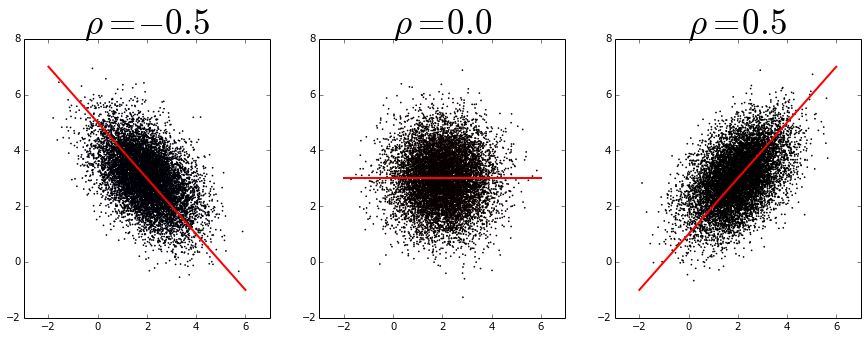

In [26]:
figure(figsize=(15, 5))
subplot(1, 3, 1)
title(r"$\rho = -0.5$", fontsize=35)
scatter(x1, y1, s=0.5, c='b')  
plot(X1, Y1, c='r', lw=2)
subplot(1, 3, 2)
title(r"$\rho = 0.0$", fontsize=35)
scatter(x2, y2, s=0.5, c='r') 
plot(X2, Y2, c='r', lw=2)
subplot(1, 3, 3)
title(r"$\rho = 0.5$", fontsize=35)
scatter(x3, y3, s=0.5, c='k')  
plot(X3, Y3, c='r', lw=2)


# Example:

100 data points, from  $y =  1+ 2x$, $x=[1, 4]$, $\sigma_x = \sigma_x = 0.05$, $\rho=0.0$

In [27]:
N_points = 100.0
x4 = np.linspace(1, 4, N_points)
y4 = 1 + 2*x4

dx = np.zeros(N_points)
dy = np.zeros(N_points)

for i in range(len(x4)):
    dx[i] = np.random.normal(0, 0.05, 1)
    dy[i] = np.random.normal(0, 0.05, 1)
    x4[i] += dx[i]
    y4[i] += dy[i]


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:5: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:6: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


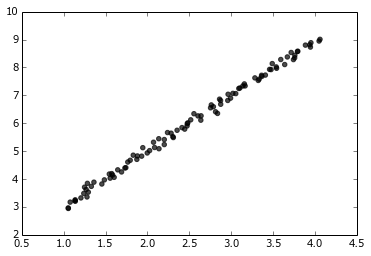

In [28]:
scatter(x4, y4, c='k', alpha=0.7)

In [29]:
def likelihood(x_i, y_i, a, b, sigmax_i, sigmay_i):
    L = -0.5 * np.sum((y_i - a - b*x_i)**2.0/(sigmay_i**2.0 + b**2.0*sigmax_i**2.0))
    return L

In [30]:
N_P = 1000.0
L4 = np.zeros([N_P, N_P])
A = np.linspace(0.5, 1.5, N_P)
B = np.linspace(1.5, 2.5, N_P)
L3 = 0.0
for i in range(len(A)):
    for j in range(len(B)):
        L4[i][j] = likelihood(x4, y4, A[i], B[j], 0.05, 0.05)

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:2: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  from ipykernel import kernelapp as app


(1.9, 2.05)

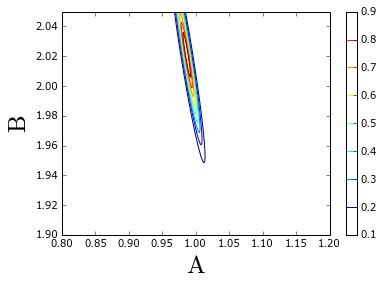

In [34]:
#figure(figsize=(8, 6))
contour(A, B, np.exp(L4-np.max(L4)), 10)
#imshow(np.exp(L4-np.max(L4)), origin='lower', extent=[0.8, 1.2, 1.9, 2.05])
xlabel('$\mathrm{A}$', fontsize=25)
ylabel('$\mathrm{B}$', fontsize=25)
colorbar()
xlim(0.8, 1.2)
ylim(1.9, 2.05)

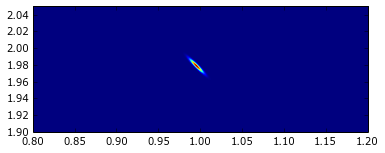

In [37]:
imshow(np.exp(L4-np.max(L4)), origin='lower', extent=[0.8, 1.2, 1.9, 2.05])